<a href="https://colab.research.google.com/github/Prasannanayak182001/calculator/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading required package: ggplot2



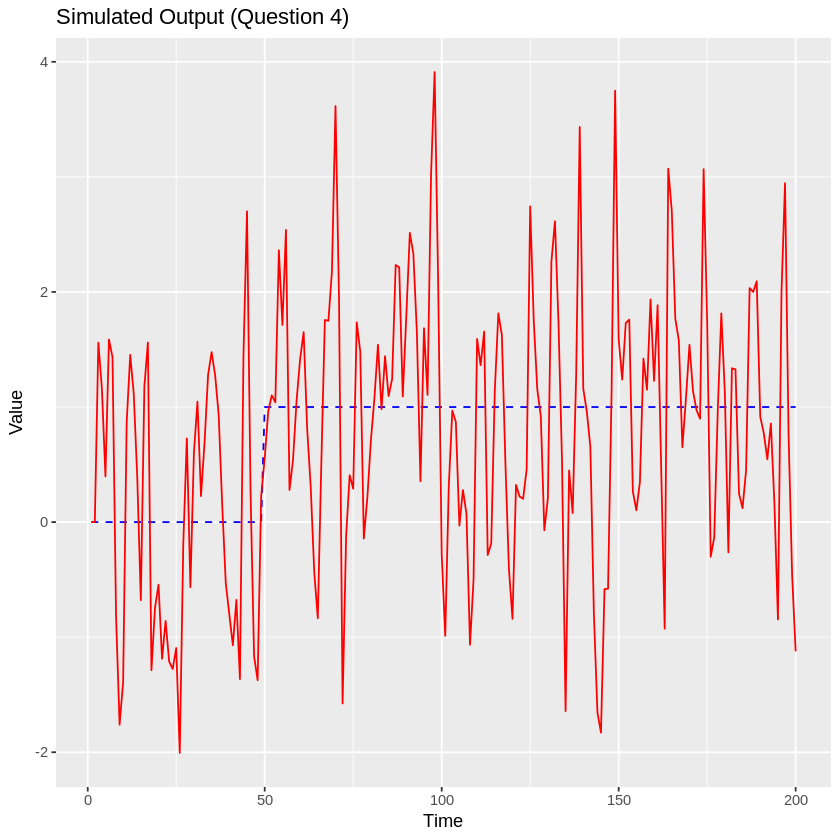

In [1]:
# Install and load ggplot2 for plotting
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)
library(ggplot2)

set.seed(123)
num_points <- 200
input_signal <- rep(0, num_points)
input_signal[50:num_points] <- 1  # Step input starts at index 50
noise_sequence <- rnorm(num_points, 0, 1)
output_signal <- numeric(num_points)

# Apply the difference equation
for(index in 3:num_points) {
  output_signal[index] <- 0.7 * output_signal[index-1] - 0.35 * output_signal[index-2] +
                          0.4 * input_signal[index-1] + 0.25 * input_signal[index-2] +
                          noise_sequence[index]
}

# Plot input vs output
ggplot(data.frame(Time = 1:num_points, Input = input_signal, Output = output_signal),
       aes(x = Time)) +
  geom_line(aes(y = Input), color = "blue", linetype = "dashed") +
  geom_line(aes(y = Output), color = "red") +
  labs(title = "Simulated Output (Question 4)", y = "Value")


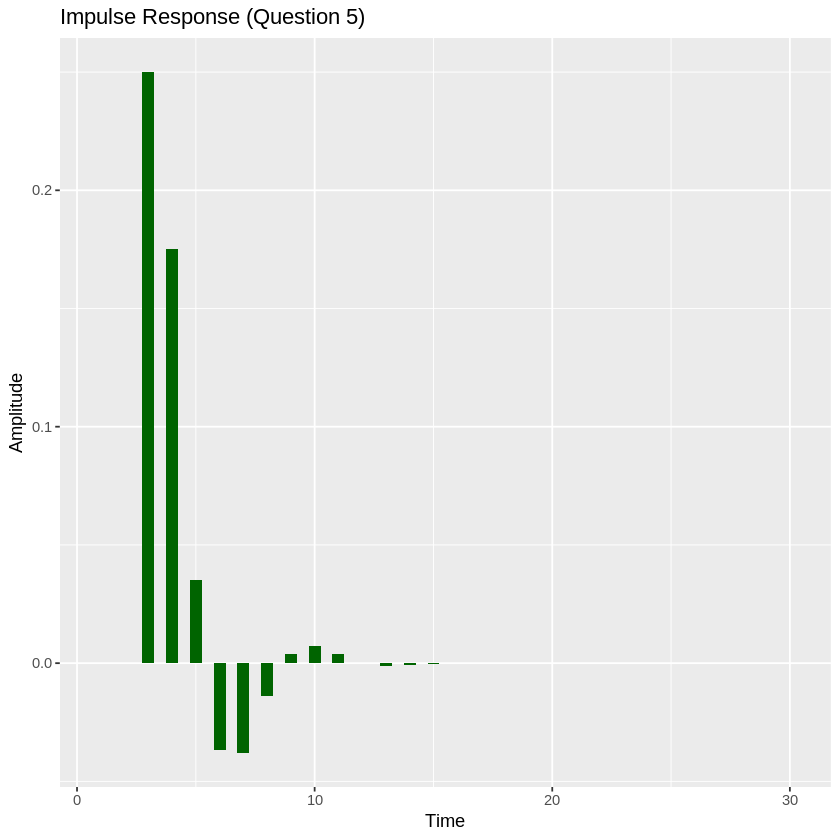

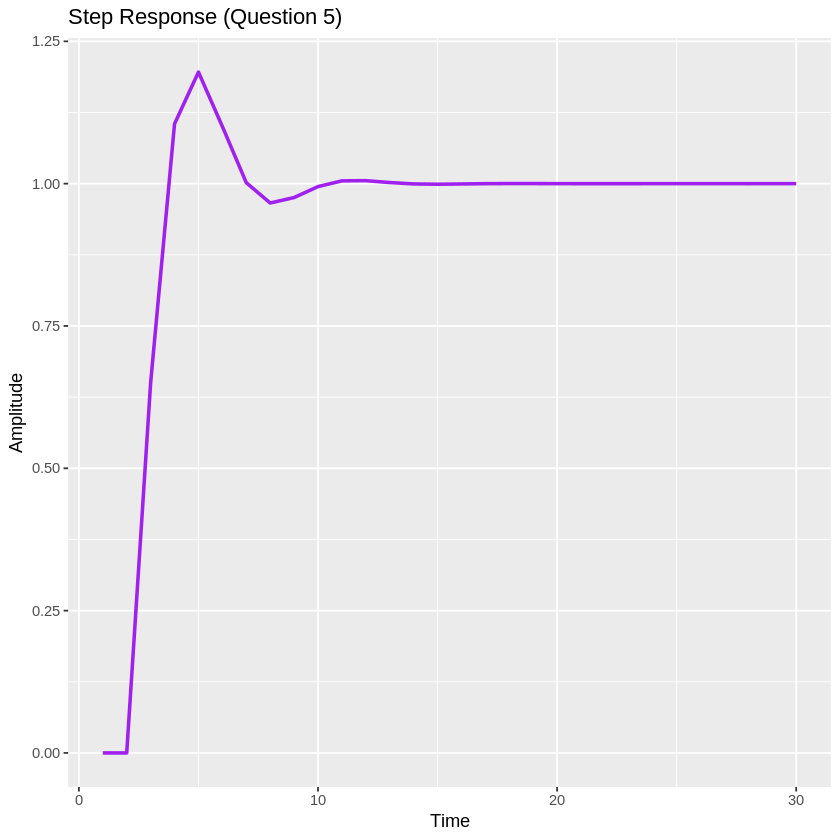

In [2]:
# Install and load ggplot2 for plotting
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)
library(ggplot2)

response_length <- 30

# Impulse response
impulse_input <- c(1, rep(0, response_length-1))
impulse_output <- numeric(response_length)
for(response_index in 3:response_length) {
  impulse_output[response_index] <- 0.7 * impulse_output[response_index-1] - 0.35 * impulse_output[response_index-2] +
                                    0.4 * impulse_input[response_index-1] + 0.25 * impulse_input[response_index-2]
}

# Step response
step_input <- rep(1, response_length)
step_output <- numeric(response_length)
for(response_index in 3:response_length) {
  step_output[response_index] <- 0.7 * step_output[response_index-1] - 0.35 * step_output[response_index-2] +
                                 0.4 * step_input[response_index-1] + 0.25 * step_input[response_index-2]
}

# Plot impulse response
ggplot(data.frame(Time = 1:response_length, Response = impulse_output),
       aes(x = Time, y = Response)) +
  geom_col(fill = "darkgreen", width = 0.5) +
  labs(title = "Impulse Response (Question 5)", y = "Amplitude")

# Plot step response
ggplot(data.frame(Time = 1:response_length, Response = step_output),
       aes(x = Time, y = Response)) +
  geom_line(color = "purple", linewidth = 1) +
  labs(title = "Step Response (Question 5)", y = "Amplitude")


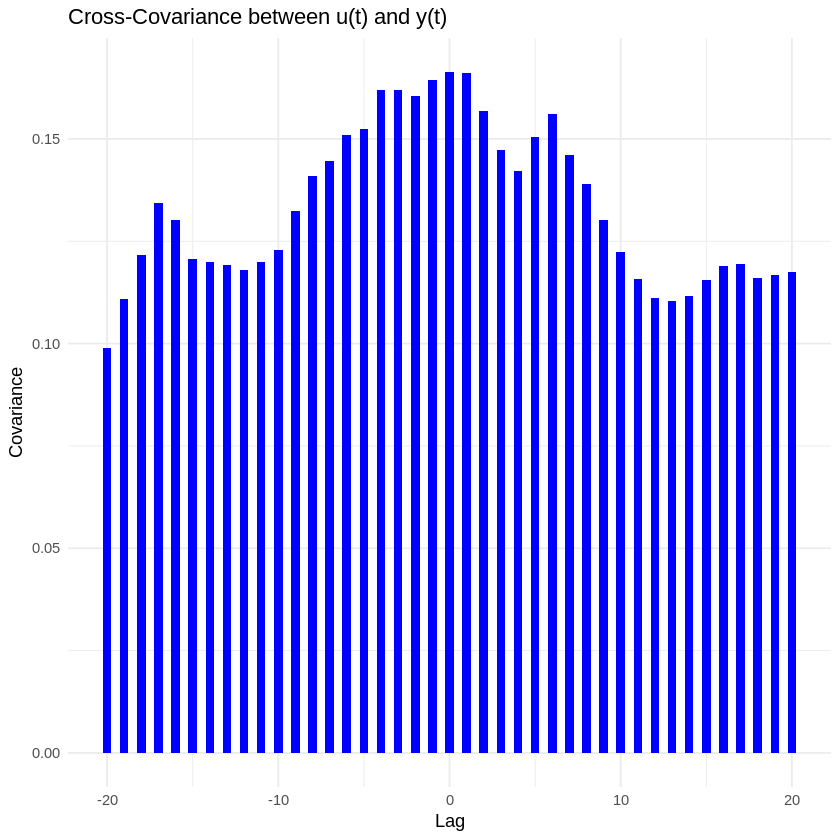

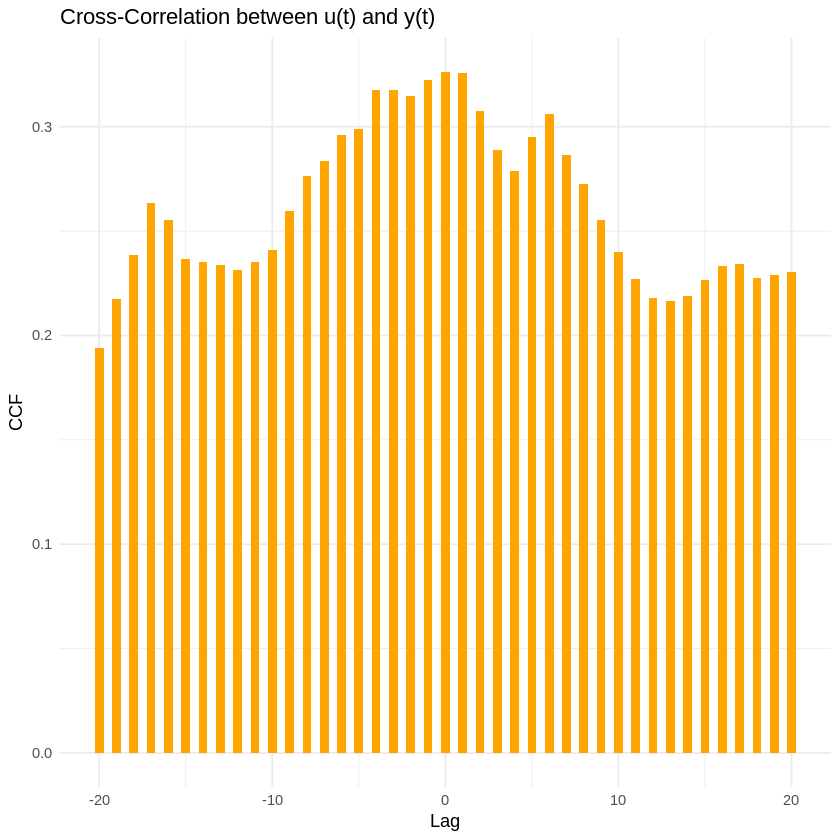

In [5]:
# Load necessary libraries
if (!require("ggplot2")) install.packages("ggplot2", dependencies = TRUE)
library(ggplot2)

# Simulate the system (re-use code from Question 4)
set.seed(123)
num_points <- 200
input_signal <- rep(0, num_points)
input_signal[50:num_points] <- 1  # Step input starting at t=50
noise_sequence <- rnorm(num_points, 0, 1)  # White noise ~ N(0,1)
output_signal <- numeric(num_points)

# Apply difference equation: y(t) = 0.7y(t-1) - 0.35y(t-2) + 0.4u(t-1) + 0.25u(t-2) + e(t)
for(index in 3:num_points) {
  output_signal[index] <- 0.7 * output_signal[index-1] - 0.35 * output_signal[index-2] +
                           0.4 * input_signal[index-1] + 0.25 * input_signal[index-2] +
                           noise_sequence[index]
}

# Compute cross-covariance (not normalized)
cross_cov <- ccf(input_signal, output_signal, lag.max = 20,
                 type = "covariance", plot = FALSE)

# Compute cross-correlation (normalized between -1 and 1)
cross_cor <- ccf(input_signal, output_signal, lag.max = 20,
                 type = "correlation", plot = FALSE)

# Create data frames for plotting
cov_df <- data.frame(Lag = cross_cov$lag, Covariance = cross_cov$acf)
cor_df <- data.frame(Lag = cross_cor$lag, Correlation = cross_cor$acf)

# Plot cross-covariance
cov_plot <- ggplot(cov_df, aes(x = Lag, y = Covariance)) +
  geom_col(fill = "blue", width = 0.5) +
  labs(title = "Cross-Covariance between u(t) and y(t)",
       x = "Lag",
       y = "Covariance") +
  theme_minimal()

# Plot cross-correlation
cor_plot <- ggplot(cor_df, aes(x = Lag, y = Correlation)) +
  geom_col(fill = "orange", width = 0.5) +
  labs(title = "Cross-Correlation between u(t) and y(t)",
       x = "Lag",
       y = "CCF") +
  theme_minimal()

# Display both plots
print(cov_plot)
print(cor_plot)



In [4]:
# Install and load forecast for ARMAX modeling
if (!require("forecast")) install.packages("forecast", dependencies = TRUE)
library(forecast)

# Prepare lagged inputs for ARMAX model
input_lag1 <- c(NA, input_signal[1:(num_points-1)])
input_lag2 <- c(NA, NA, input_signal[1:(num_points-2)])
armax_data <- na.omit(data.frame(Output = output_signal, Lag1 = input_lag1, Lag2 = input_lag2))

# Fit ARMAX(2,0) model without intercept
armax_model <- Arima(
  armax_data$Output,
  order = c(2, 0, 0),
  xreg = as.matrix(armax_data[, c("Lag1", "Lag2")]),
  include.mean = FALSE
)

# Display estimated parameters and compare to true values
cat("=== ARMAX Model Results (Question 7) ===\n")
cat("Estimated AR coefficients (true: 0.7, -0.35):\n")
print(round(armax_model$coef[1:2], 3))
cat("\nEstimated input coefficients (true: 0.4, 0.25):\n")
print(round(armax_model$coef[3:4], 3))


Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘x13binary’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’


Warning message in install.packages("forecast", dependencies = TRUE):
“installation of package ‘x13binary’ had non-zero exit status”
Warning message in install.packages("forecast", dependencies = TRUE):
“installation of package ‘seasonal’ had non-zero exit status”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



=== ARMAX Model Results (Question 7) ===
Estimated AR coefficients (true: 0.7, -0.35):
   ar1    ar2 
 0.628 -0.325 

Estimated input coefficients (true: 0.4, 0.25):
 Lag1  Lag2 
0.645 0.320 
